In [1]:
cd ../../../../E_drive/Dataset/Data-VPD-github1/data/Video/

/data/E_drive/Dataset/Data-VPD-github1/data/Video


In [2]:
import os
import matplotlib.pyplot as plt
os.getcwd()

'/data/E_drive/Dataset/Data-VPD-github1/data/Video'

In [3]:
import numpy as np
import cv2
from numba import jit, cuda

In [4]:
face_cascade = cv2.CascadeClassifier('../../../opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../../../opencv-master/data/haarcascades/haarcascade_eye.xml')

In [5]:
a =[]
a.append(2)
a.append(5)
a
import glob

In [6]:
from numba import jit

class vidproc:
    def __init__(self, cap =[], sav_opt = 0, filename=[]):
        self.pixval1 = []
        self.cap = cap
        self.fps = cap.get(cv2.CAP_PROP_FPS)
        self.sav_opt =  sav_opt
        self.filename =  filename
    
    @jit
    def run_vid(self):
        pixVal = []
        pixVal2 = []
        cropmn = []
        loop_t = 0
        while(self.cap.isOpened()):
            ret, frame = self.cap.read() 

            if ret ==0:
                break
            # converting BGR to HSV 

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(
                    gray,
                    scaleFactor=1.1,
                    minNeighbors=5,
                    minSize = (30,30),
                    flags = cv2.CASCADE_SCALE_IMAGE
                    )

            cropIm = frame[600:700, 700:750]
            cropmn.append(cropIm.mean())

            #eyes = eye_cascade.detectMultiScale(gray, 1.1,3)

            #for f in faces:
                #x, y, w, h = [ v for v in f ]
               # cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,255))

                #sub_face = frame[y-50:y+h+50, x:x+w]
                #
                #sub_face = frame[180:750, 750:1170]
                
                #sub_face = cv2.resize(sub_face, (600,700))
                
                #[a,b,c,d] = [30, 50, 550, 240]
                
                #cv2.rectangle(sub_face, (a,b), (c, d), (255,255,255))
                
                #chickimg = sub_face[b:d, a:c]
                
                #chickimg =  cv2.resize(chickimg, (200, 200))
                
            
            sub_face = frame[200:800, 670:1050]
                
            sub_face = cv2.resize(sub_face, (600,700))
                
            [a,b,c,d] = [380, 350, 580, 550]
                
            cv2.rectangle(sub_face, (a,b), (c, d), (255,255,255))
                
            chickimg = sub_face[b:d, a:c]
                
            chickimg =  cv2.resize(chickimg, (200, 200))
            
            
            # Display the resulting frame
        
            self.pixval1.append(chickimg)
            
            
            cv2.imshow('Video', sub_face)           
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
              
            
            loop_t = +1

        pixd = {'p1': pixVal, 'p2': pixVal2, 'cpm' : cropmn}
        self.pixval1 = np.array(self.pixval1)
        
        if self.sav_opt: 
            self.vidwrit(i2s =  self.pixval1) 
        
        return pixd, self.pixval1
    
    
    def vidwrit(self, i2s=[]):
        
        out = cv2.VideoWriter('TrainPrep/RCheek/' + self.filename ,cv2.VideoWriter_fourcc(*'DIVX'), 
                              self.fps, (200, 200))
        for i in range(len(i2s)):
            out.write(i2s[i])
        out.release()

In [7]:
vidname = 'p15_physical.MP4'
cap = cv2.VideoCapture(vidname)
    # Check if camera opened successfully
videop =  vidproc(cap = cap, sav_opt = 0, filename = vidname)
pixVal, pv1 = videop.run_vid()

cap.release()
cv2.destroyAllWindows()

pv1 = np.array(pv1)

<ipython-input-6-76a373ef29f1>:11: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "run_vid" failed type inference due to: Untyped global name 'face_cascade': cannot determine Numba type of <class 'cv2.CascadeClassifier'>

File "<ipython-input-6-76a373ef29f1>", line 26:
    def run_vid(self):
        <source elided>

            faces = face_cascade.detectMultiScale(
            ^

  @jit
<ipython-input-6-76a373ef29f1>:11: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "run_vid" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-6-76a373ef29f1>", line 17:
    def run_vid(self):
        <source elided>
        loop_t = 0
        while(self.cap.isOpened()):
        ^

  @jit
/home/zahid/anaconda3/envs/work_env/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "run_vid" was compil

In [8]:
vidname = 'p1_physical.MP4'
'TrainPrep/LCheek/'+vidname

'TrainPrep/LCheek/p1_physical.MP4'

In [9]:
out = cv2.VideoWriter('TrainPrep/LCheek/p13vong_normal.avi',cv2.VideoWriter_fourcc(*'DIVX'), 25.0, (200, 200))
for i in range(len(pv1)):
    out.write(pv1[i])
out.release()

In [10]:
#videop.vidwrit(pv1)

In [11]:
cap = cv2.VideoCapture('p13_normal.MP4')
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()
print(fps)

25.0


In [12]:

plt.plot(pixVal1['cpm']), plt.xlabel("Time"), plt.ylabel("Magnitude"), plt.title("Original signal")

NameError: name 'pixVal1' is not defined

In [13]:
bb= np.array( pixVal1['cpm'])

#bb= np.reshape(bb, [-1,1])

bb.shape

NameError: name 'pixVal1' is not defined

In [14]:
import scipy
from scipy.fftpack import fft 

yf = scipy.fftpack.fft(bb) 
 
xf =  np.linspace(0,12.5, 500)
plt.plot(np.abs(yf[20:200]))


## Get frequencies corresponding to signal PSD 

NameError: name 'bb' is not defined

In [15]:
freq = np.fft.fftfreq(bb.size, d=1/25)
val = np.abs(freq)<.8

yf[val] = 0

val = np.abs(freq)>4

yf[val] = 0


plt.plot(freq, np.abs(yf)), plt.xlabel("Frequency"), plt.ylabel("Magnitude"), plt.title("Filtered frequency")

resig = scipy.fftpack.ifft(yf)
plt.figure()
plt.plot(resig), plt.xlabel("Time"), plt.ylabel("Magnitude"),  plt.title("Reconstructed")

NameError: name 'bb' is not defined

In [16]:
pwd

'/data/E_drive/Dataset/Data-VPD-github1/data/Video'

In [17]:
file= open("../ECG/p15_physical.txt","rt")
text = file.read()
file.close()

val = text.split()

len(val)
val[520]

'-97'

dict

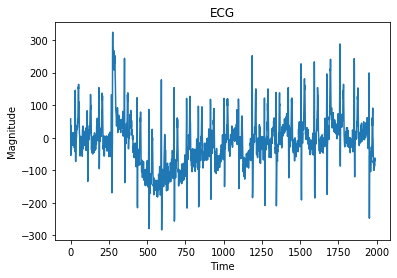

In [18]:
# Reading ECG signal form the text file 
EcgS = {}

for i,j in zip(['#I[uV]','#II[uV]', '#III[uV]', '#avR[uV]', '#avL[uV]'],['#II[uV]', '#III[uV]', '#avR[uV]', '#avL[uV]','#avF[uV]']):
    resf = np.array( [ _ for _ in range(len(val)) if val[_] == i])
    rese = np.array( [_ for _ in range(len(val)) if val[_] == j])
    EcgS[i] =  np.array(val[resf[0]+1: rese[0]]).astype(float)

EcgS[j] = np.array(val[rese[0]+1:]).astype(float)

#plt.plot(val2)
plt.plot(EcgS['#I[uV]'][8:]), plt.xlabel("Time"), plt.ylabel("Magnitude"),  plt.title("ECG")

type(EcgS)

In [19]:
type(EcgS)

dict

In [20]:
from scipy.io import loadmat
x=loadmat('../../../Merl_Tim/Subject1_still/PulseOX/pulseOx.mat')

In [21]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pulseOxRecord', 'pulseOxTime', 'numPulseSample'])

In [22]:
x['__globals__']

[]

In [23]:
pulseoxR = np.squeeze(x['pulseOxRecord'])
pulseoxT = x['pulseOxTime']

In [24]:

pulT = []
pulseoxR.shape[1]

IndexError: tuple index out of range

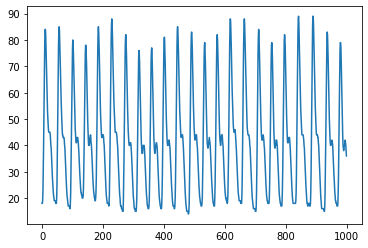

In [25]:
pulR = []
for i in range(pulseoxR.shape[0]):
    pulR.append(pulseoxR[i][0][0])

plt.plot(np.array(pulR[7000:8000]))

pulR = np.array(pulR)

In [26]:
plt.plot(pul[1000:2000])

NameError: name 'pul' is not defined

In [30]:
cd ../../../Merl_Tim/Subject1_still

/data/E_drive/Dataset/Merl_Tim/Subject1_still


In [121]:
ls

IR/  PulseOX/  RGB_demosaiced/  RGB_raw/


In [36]:
img1= cv2.imread("IR/Frame00000.pgm")
iD_ir = "IR"
iD_rgb = "RGB_demosaiced"
dataPath =  os.path.join(iD_ir, '*.pgm')
files = glob.glob(dataPath)

In [109]:
data = []

for f1 in files:
    img = cv2.resize(cv2.imread(f1)[:,:,1], (200,200))
    img = img[:,:, np.newaxis]
    data.append(img)

In [110]:
data = np.array(data)

In [111]:
print(data.shape)
print(pulR.shape)
10703//2

(5386, 200, 200, 1)
(10703,)


5351

In [123]:
trX1 = np.reshape(data[25:65], [200,200,40])
trX1.shape

(200, 200, 40)

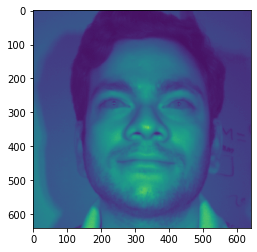

In [120]:
gc =cv2.imread(files[0])[:,:,1]
gc = gc[:,:,np.newaxis]
gc.shape
plt.imshow(gc[:,:,0])

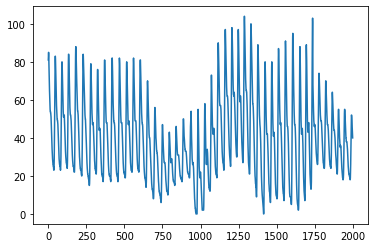

In [80]:
pulR.shape
plt.plot(pulR[0:2000])

In [127]:
from random import seed, randint
seed(1)

1100

In [136]:
rv = [randint(0,5350) for _ in range(25)]
randint(0,5350)
rv =  np.array(rv)

In [140]:
trainX = []
trainY = []

for i in rv:
    img = np.reshape(data[i:i+40], [200,200,40])
    trainX.append(img)
    ppg = pulR[2*i: 2*i+80]
    trainY.append(ppg)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [146]:
trainX.shape

(25, 200, 200, 40)